## Mic Check / Introduction
By this point, we have our data as clean and as well structured as possible. Before we go on and apply some cool algorithms to our data, we should first explore and make some basic conclusions about it.

The exploratory data analysis techniques (EDA) are some common patterns which are used to extract some basic information about the distribution of the data, the most common values and so on. The patterns we can conclude from EDA techniques are called "visible", those that require fancy algorithms are called "hidden". Smart, right? 

We will make conclusions on the following 3 questions:
1. What are the most common words used by each rapper?
2. What is the size of the vocabulary (unique words) used by each rapper?
3. What rapper swears the most?

## 1. What are the most common words used by each rapper?
This question requires that we examine the words separately, that's why we are so lucky to have our words matrix. Let's read it in from the file.

In [12]:
import pandas
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pickle
import numpy as np

data = pandas.read_pickle('word_matrix.pkl')
data = data.transpose()
data.head()

,biggie,fifty,game,nas,snoop,tupac
aaaahif,0,0,1,0,0,0
abandoned,0,0,1,0,0,0
ac,1,0,0,0,0,0
accountant,1,0,0,0,0,0
accounts,0,0,0,1,0,0


Now let's find the top 50 most commonly used words for each rapper.

In [13]:
top_50 = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(50)
    top_50[c]= list(zip(top.index, top.values))

Let's take a look at our results.

In [14]:
top_50

{'biggie': [('biggie', 39),
  ('know', 31),
  ('dont', 26),
  ('just', 25),
  ('like', 22),
  ('got', 21),
  ('love', 21),
  ('good', 18),
  ('cause', 18),
  ('thats', 18),
  ('shit', 17),
  ('big', 15),
  ('im', 15),
  ('poppa', 14),
  ('youre', 14),
  ('hypnotize', 14),
  ('niggas', 14),
  ('uh', 13),
  ('dick', 12),
  ('em', 12),
  ('nigga', 12),
  ('fuck', 12),
  ('broke', 11),
  ('come', 11),
  ('ways', 10),
  ('words', 10),
  ('guess', 10),
  ('uhhuh', 10),
  ('flashy', 10),
  ('number', 10),
  ('let', 9),
  ('paid', 9),
  ('yeah', 8),
  ('ass', 8),
  ('aint', 8),
  ('right', 8),
  ('baby', 8),
  ('money', 7),
  ('tell', 7),
  ('hit', 7),
  ('mad', 7),
  ('hold', 7),
  ('chance', 7),
  ('ill', 6),
  ('oh', 6),
  ('make', 6),
  ('black', 6),
  ('girl', 6),
  ('friends', 6),
  ('hoes', 6)],
 'fifty': [('im', 38),
  ('nigga', 31),
  ('niggas', 29),
  ('dont', 24),
  ('know', 20),
  ('rains', 19),
  ('shit', 16),
  ('imma', 16),
  ('aint', 16),
  ('got', 16),
  ('men', 15),
  ('pours

Now, we see that some of this words are just stop words and have no real meaning. We will try to remove them:

In [15]:
# Get the stop words registered in the library
stop_words = text.ENGLISH_STOP_WORDS

clean_data = pandas.read_pickle('clean_data.pkl')

# Update the word matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(clean_data.lyrics)
data_non_stop_words = pandas.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_non_stop_words.index = clean_data.index

# We will save the updated word matrix
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_non_stop_words.to_pickle("data_non_stop_words.pkl")

Now let's see if our data is clean of stop words.

In [16]:
data = pandas.read_pickle('word_matrix.pkl')
data = data.transpose()
data.head()

top_50 = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(50)
    top_50[c]= list(zip(top.index, top.values))
    
top_50

{'biggie': [('biggie', 39),
  ('know', 31),
  ('dont', 26),
  ('just', 25),
  ('like', 22),
  ('got', 21),
  ('love', 21),
  ('good', 18),
  ('cause', 18),
  ('thats', 18),
  ('shit', 17),
  ('big', 15),
  ('im', 15),
  ('poppa', 14),
  ('youre', 14),
  ('hypnotize', 14),
  ('niggas', 14),
  ('uh', 13),
  ('dick', 12),
  ('em', 12),
  ('nigga', 12),
  ('fuck', 12),
  ('broke', 11),
  ('come', 11),
  ('ways', 10),
  ('words', 10),
  ('guess', 10),
  ('uhhuh', 10),
  ('flashy', 10),
  ('number', 10),
  ('let', 9),
  ('paid', 9),
  ('yeah', 8),
  ('ass', 8),
  ('aint', 8),
  ('right', 8),
  ('baby', 8),
  ('money', 7),
  ('tell', 7),
  ('hit', 7),
  ('mad', 7),
  ('hold', 7),
  ('chance', 7),
  ('ill', 6),
  ('oh', 6),
  ('make', 6),
  ('black', 6),
  ('girl', 6),
  ('friends', 6),
  ('hoes', 6)],
 'fifty': [('im', 38),
  ('nigga', 31),
  ('niggas', 29),
  ('dont', 24),
  ('know', 20),
  ('rains', 19),
  ('shit', 16),
  ('imma', 16),
  ('aint', 16),
  ('got', 16),
  ('men', 15),
  ('pours

This one is exciting. Let's create word clouds of the 50 most commonly used words for each rapper.

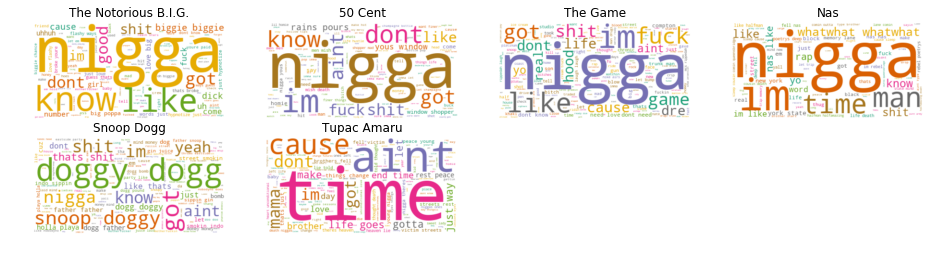

In [17]:
word_cloud = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

plt.rcParams['figure.figsize'] = [16, 6]

rappers_data = ';'.join(data.columns)
rappers = []
for item in rappers_data.split(';'): # comma, or other
    rappers.append(item)
    
rappers_full_names = ['The Notorious B.I.G.', '50 Cent', 'The Game', 'Nas', 'Snoop Dogg', 'Tupac Amaru']

for i, rapper in enumerate(data.columns):
    word_cloud.generate(clean_data.lyrics[rapper])
    
    plt.subplot(3, 4, i+1)
    plt.imshow(word_cloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(rappers_full_names[i])
    
plt.show()

So, what is the answer to the question "What are the most common words used by each rapper"?

For B.I.G., 50 Cent, The Game and Nas is the 'N' word, Snoop likes to 'put some respect on his name', and Tupac talks about time and his mother.

## 2. What is the size of the vocabulary (unique words) used by each rapper?
We will try to find out how many different words each rapper uses.

In [18]:
unique_words = []
for rapper in data.columns:
    uniques = (data[rapper]).to_numpy().nonzero()[0].size
    unique_words.append(uniques)
    
unique_words

#We will put the unique word count in a dataframe
data_words = pandas.DataFrame(list(zip(rappers_full_names, unique_words)), columns=['rapper', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words', ascending=False)
data_unique_sort

,rapper,unique_words
3,Nas,1082
0,The Notorious B.I.G.,863
5,Tupac Amaru,713
2,The Game,702
1,50 Cent,693
4,Snoop Dogg,622


Now, let's add the total number of words for each rapper to this table.

In [19]:
# Find the total number of words that a comedian uses
total_words_list = []
for rapper in data.columns:
    totals = sum(data[rapper])
    total_words_list.append(totals)
    
# Let's add some columns to our dataframe
data_words['Total words #'] = total_words_list

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_words

,rapper,unique_words,Total words #
0,The Notorious B.I.G.,863,1725
1,50 Cent,693,1498
2,The Game,702,1327
3,Nas,1082,1890
4,Snoop Dogg,622,1566
5,Tupac Amaru,713,1686


We can see that Nas used most unique and has the longest verses. Let's plot the unique words analysis:

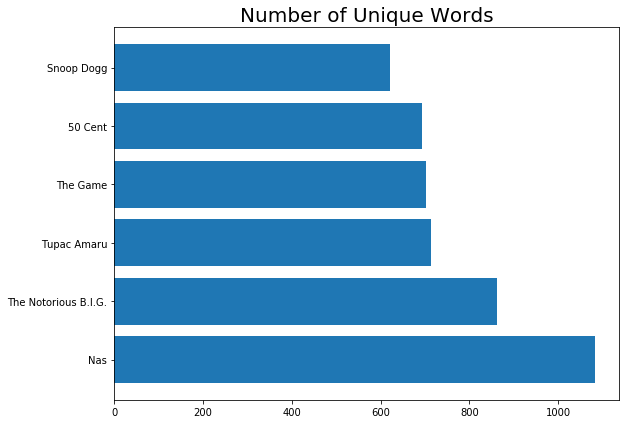

In [20]:
y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.rapper)
plt.title('Number of Unique Words', fontsize=20)

plt.tight_layout()
plt.show()

Let's finish the Exploratory Data Analysis with the third technique.

## 3. What rapper swears the most?

In [21]:
swear_words = data.transpose()[['bitch', 'nigga', 'fucking', 'fuck', 'shit']]
data_swear_words = pandas.concat([swear_words.nigga, swear_words.bitch, swear_words.fucking + swear_words.fuck, swear_words.shit], axis=1)
data_swear_words.columns = ['nigga', 'bitch', 'fuck', 'shit']
data_swear_words

,nigga,bitch,fuck,shit
biggie,12,3,15,17
fifty,31,7,15,16
game,28,6,20,12
nas,4,1,8,15
snoop,14,4,5,30
tupac,15,1,0,2


Tupac is doing quite well in comparison with the others. We will plot the two most used words: the 'N' word and 'shit'. 

biggie
fifty
game
nas
snoop
tupac


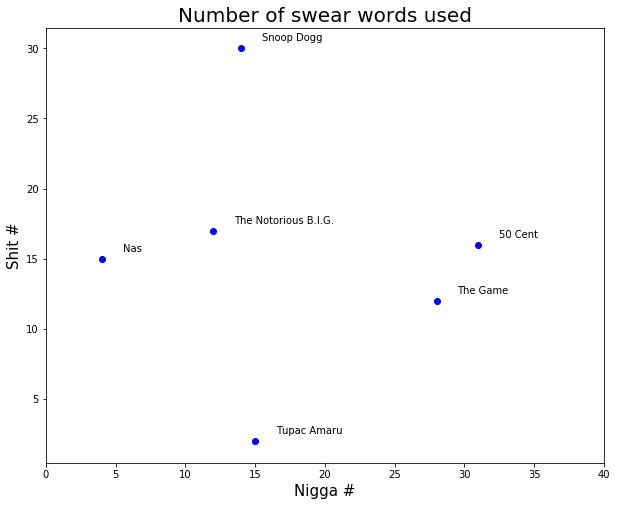

In [22]:
plt.rcParams['figure.figsize'] = [10, 8]

for i, rapper in enumerate(data_swear_words.index):
    print(rapper)
    x = data_swear_words.nigga.loc[rapper]
    y = data_swear_words.shit.loc[rapper]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, rappers_full_names[i], fontsize=10)
    plt.xlim(0, 40) 
    
plt.title('Number of swear words used', fontsize=20)
plt.xlabel('Nigga #', fontsize=15)
plt.ylabel('Shit #', fontsize=15)

plt.show()

Conclusion: We can be satisfied with what we got as results. It's not perfect and we could definitely clean our data a lot better, but it's sufficient for now. As a reminder, we went through 3 different EDA (Exploratory Data Analysis) techniques and each gave us some different conclusion. Our basic data analysis was a success, now we go on to do the real thing.